In [1]:
# Parameterslibrary = "CRISPR9"fastq_path = '{PATH_TO_LGR_GA_02}'tsv_path = '{PATH_TO_TSV}'

# Assign guides to cells

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# library = "CRISPR8"# fastq_path = "/home/vsevim/prj/tf/CATATAC_4/data//atac_and_guidecap"# tsv_path = '{PATH_TO_TSV_2}'

In [4]:
stats = []

Count raw reads

In [5]:
n_raw_reads = !zcat {fastq_path}/{library}*R1*.fastq.gz | grep "^@" | wc -l
n_raw_reads = int(n_raw_reads[0])
stats += [['Raw Reads', n_raw_reads]]

Count reads w CS1

In [6]:
n_reads_w_CS1 = !zcat {tsv_path}/{library}*w_CS.TSV.gz | wc -l
n_reads_w_CS1 = int(n_reads_w_CS1[0])
stats += [['Reads with CS1', n_reads_w_CS1]]

In [7]:
stats

[['Raw Reads', 17419229], ['Reads with CS1', 4313770]]

### Load the barcode, umi, guide csv

In [8]:
#library = library.upper()
tsv_path = f"{tsv_path}/{library}_ALL_STRUCTURED.TSV"

### Deduplicate 

In [9]:
df_needs_dedup = pd.read_csv(tsv_path, sep="\t")
# I was deduplicating by umi only until analyzing condition 6, 
# but I need to deduplicate by umi+protospacer
df = df_needs_dedup.drop_duplicates(subset=["umi", "protospacer"], keep='first')

In [10]:
df_needs_dedup.head()

,atac_barcode,umi,protospacer,guide,gene,read_name,barcode
0,GTCCGTTAGCTATTGT,CNCTTTTTTCAC,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,A01102:502:HF5LTDSX5:4:1101:24867:1000,AAGCGGGTCTAAATCG
1,TTAGGTTTCAGCTACC,TCATTATGTATT,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,A01102:502:HF5LTDSX5:4:1101:23601:1094,GCACCTAAGTCTTGAA
2,TAACACGCACGGTAAC,GTATACTTTGCG,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,A01102:502:HF5LTDSX5:4:1101:19542:1235,TCGCATTGTCCTAATC
3,GTCCGTTAGCTATTGT,CTCTTTTTTCAC,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,A01102:502:HF5LTDSX5:4:1101:24804:1297,AAGCGGGTCTAAATCG
4,TTTAACCAGTTAACCT,ATCATGTATTTG,GCTGACCCTGCGGGGAAGAA,GATA5_1,GATA5,A01102:502:HF5LTDSX5:4:1101:3360:1329,AGCTAGTTCTGTAAGC


In [11]:
# Count unique barcodes before protospacer check etc
len(df_needs_dedup.drop_duplicates(subset = "barcode"))

80958

In [12]:
n_reads_w_PS  = len(df_needs_dedup)
n_dedup_reads = len(df)

stats += [['Reads with Protospacer', n_reads_w_PS]]
stats += [['Dedup reads', n_dedup_reads]]


In [13]:
n_uniq_barcodes = len(df['barcode'].unique())
stats += [["Unique barcodes", n_uniq_barcodes]]

### Count UMIs per barcode

In [14]:
barcode_counts = df['barcode'].value_counts()
barcode_counts.head()

CGCATTACATCATGTG    231
TTCAACCGTCCGCTGT    230
CCCAGCACAGTGAACG    216
CACTTAAAGCTCAATA    211
CATGCGCAGGATCACT    210
Name: barcode, dtype: int64

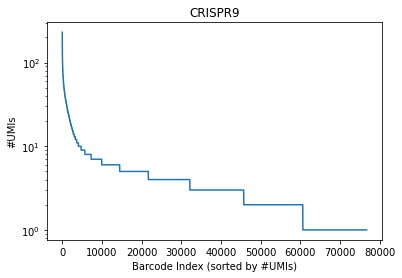

In [15]:
plt.plot(barcode_counts.values)
plt.yscale('log')
plt.xlabel("Barcode Index (sorted by #UMIs)")
plt.ylabel("#UMIs")
plt.title(library)
plt.savefig("plot1.png")
plt.show()

### Count genes per barcode

In [16]:
barcode_counts = df['barcode'].value_counts()
barcode_counts.head()

CGCATTACATCATGTG    231
TTCAACCGTCCGCTGT    230
CCCAGCACAGTGAACG    216
CACTTAAAGCTCAATA    211
CATGCGCAGGATCACT    210
Name: barcode, dtype: int64

In [17]:
#------------------------------------------------------------------------------------

In [18]:
df_stats = pd.DataFrame(stats, columns=["Stat", "Count"])
df_stats

,Stat,Count
0,Raw Reads,17419229
1,Reads with CS1,4313770
2,Reads with Protospacer,3877416
3,Dedup reads,362754
4,Unique barcodes,76694


In [19]:
for i in df_stats.Count:
    print(i)

17419229
4313770
3877416
362754
76694
